In [54]:
import sys
sys.path.append('../')
import functions
exec(open('./functions.py').read())
import demoji
#demoji.download_codes()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
#load labelled data (generated in file 2.preprocessing_en)
data = pickle.load(open('data_n_models/4.eng_df_bot_classified.pkl', "rb"))

#filter out bot reated data
data = data[data['bot']==False]
data['lemma']=[strip_multiple_whitespaces(c) for c in data['lemma']]
data['lemma']=clean_complete(data.lemma)
data = data.drop_duplicates(subset=['lemma'])
data.head()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:64: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:66: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:76: FutureWarning: The default value of regex will change from True to False in a future version.
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:82: FutureWarning: The default value of regex will change from True to False in a future version.


,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
0,0,819101311715131392,77,Ali09685762,@Zalando give me my money you owe me!!!,0,,07-Mar-2021,6,False,0.0,NaN,zalando,en,money owe,give money you owe me!!!,0.0000,money owe,False
1,1,1189512849472643072,105,Labellerr1,#VirtualStyling and try-on increases the conve...,0,chandigarh,06-Mar-2021,18,False,0.0,NaN,zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...,0.7650,virtualstyle try increase conversion rate larg...,False
3,3,1125728513666048000,9604,DommeLineCoUk,@missbellalugosi @Zalando Problem starts at Ad...,0,,06-Mar-2021,2193,False,1.0,1.368196e+18,zalando,en,problem starts adidas selling latex websites,Problem starts Adidas. They're selling latex t...,-0.4019,problem start adida sell latex website,False
4,4,2614256724,35470,medboyUK,@missbellalugosi @Zalando Welcome to my world ...,0,"West Midlands, UK",06-Mar-2021,2503,False,1.0,1.368196e+18,zalando,en,welcome world sneering disdain,Welcome world sneering and disdain!,-0.1007,welcome world sneer disdain,False
5,5,978410484155199488,1549,missbellalugosi,Hey @Zalando these clothes are not made of la...,0,GERMANY / UK / USA,06-Mar-2021,13827,False,17.0,NaN,zalando,en,hey clothes latex plastic latex rubber stitche...,"Hey these clothes are not made latex, they are...",0.5362,hey clothe latex plastic latex rubber stitch r...,False


In [41]:
for i, value in data[10:20].lemma.iteritems():
    print(i, value)

11 recieve wrong item do n’t know item cheap item want
12 send delivery paper bag
13 order eventually thing happen expectation feed information whomever concerned zalando
14 hey order product web shop item " fast delivery " suppose arrive today unfortunately ship parcel time happen sad
15 zalando think big pregnant suggest lovely maternity clothe ️ ️ ️ ️ ️ ️ ️ thank love ️ ️ ️ ️
16 think belong sport shoe section
17 new redezign circularity pilot product product pilot equip digital tag save product datum scan able discover product history digital product site ️ ️
18 zalando ride cargo bike delivery service netherland
19 order ship able provide status update
20 check new cto cto podcast format dedicate impactful tech in episode victoria schmierer share story implement pre own give new life clothe ecommerce sustainability reuse rewear


# clustering with LatentDirichletAllocation

https://ourcodingclub.github.io/tutorials/topic-modelling-python/

# on the whole dataset

In [59]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [49]:
 # Each row is a tweet and each column is a word. The numbers in each position tell us how many times this word appears in this tweet.
 tf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
print(tf_feature_names)

['able', 'absolute', 'absolutely', 'abt', 'abuse', 'acc', 'accept', 'access', 'accessory', 'accident', 'accidentally', 'accord', 'account', 'act', 'action', 'active', 'actual', 'actually', 'add', 'addict', 'addiction', 'address', 'adida', 'admin', 'admire', 'admit', 'adorable', 'adult', 'advert', 'advertise', 'advertising', 'advice', 'advise', 'adwd', 'affect', 'afford', 'affordable', 'afraid', 'afternoon', 'age', 'agent', 'ago', 'agree', 'ahead', 'ahh', 'ahhh', 'aid', 'ain', 'air', 'airport', 'album', 'aliexpress', 'allow', 'alright', 'alternative', 'amazing', 'amazon', 'america', 'american', 'angel', 'angry', 'animal', 'ankle', 'announce', 'annoy', 'annoyed', 'annoying', 'answer', 'anthropologie', 'anti', 'anybody', 'anymore', 'anyways', 'apart', 'apology', 'app', 'apparently', 'appear', 'apple', 'application', 'apply', 'appreciate', 'approach', 'april', 'area', 'aren', 'argo', 'argue', 'argument', 'arm', 'arrive', 'art', 'article', 'artist', 'asap', 'asc', 'asian', 'ask', 'asos', 'a

In [66]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [67]:
model.fit(tf)

LatentDirichletAllocation(n_components=9, random_state=0)

a function which takes in our model object model, the order of the words in our matrix tf_feature_names and the number of words we would like to show. Use this function, which returns a dataframe, to show you the topics we created. Remember that each topic is a list of words/tokens and weights

In [68]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [73]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,order,5308.0,boohoo,1363.9,asos,6091.7,year,1263.7,asos,3221.1,win,1177.6,asosiwd,1243.1,boohoo,9861.4,’t,4483.0
1,day,2073.7,zalando,1290.0,buy,1300.7,myasosluck,1062.6,check,2185.9,boohootreat,1003.0,asos,1079.6,people,1403.8,n,4479.6
2,delivery,1798.1,girl,1276.1,size,1192.9,asos,770.9,fashion,2041.4,asos,994.8,buy,624.5,like,1125.6,like,2853.7
3,return,1746.1,boohooluckydip,637.0,code,843.0,come,684.6,good,1944.4,need,700.1,woman,578.6,man,688.2,asos,2674.9
4,help,1443.7,let,603.7,jean,798.0,old,585.6,love,1930.2,new,683.4,friend,502.2,fuck,669.8,boohoo,1353.3
5,send,1442.8,city,582.5,discount,663.6,week,564.3,poshmark,1467.1,love,672.9,good,492.7,shit,662.3,look,1142.4
6,’t,1395.1,happy,403.1,thank,593.1,month,542.5,shopmycloset,1456.1,spend,576.5,model,469.6,want,595.1,clothe,1087.6
7,n,1392.5,omg,390.9,shoe,574.8,day,534.2,item,1428.7,birthday,572.5,wear,468.1,bad,533.6,shop,700.7
8,asos,1307.3,collection,355.1,fit,572.7,work,524.0,share,1305.1,yes,548.5,work,410.1,fucking,502.4,feel,683.9
9,refund,1184.1,luck,305.5,pair,565.1,time,501.4,style,1304.1,nationalpetday,463.1,man,406.9,bitch,411.0,know,576.4


# Zalando only

In [80]:
data_zal = data[data['keyword']=='zalando']

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data_zal['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,zalando,97.0,zalando,167.1,zalando,129.2,zalando,519.3,want,70.1,zalando,138.1,zalando,128.3,zalando,102.8,zalando,94.5
1,good,87.1,order,109.1,thank,85.1,like,110.1,zalando,63.8,fashion,101.7,look,69.7,time,67.1,new,86.1
2,work,59.1,account,105.8,day,62.1,cop,24.8,’t,44.1,need,70.1,retail,46.1,today,57.1,customer,50.1
3,return,56.1,buy,91.0,nike,40.1,help,18.9,n,44.1,online,67.7,growth,40.1,join,48.2,love,48.4
4,brand,47.8,drop,38.1,sell,39.1,account,9.9,stock,41.1,market,48.8,size,37.1,company,45.9,product,40.1
5,think,31.0,week,29.9,success,33.1,look,0.3,european,16.2,check,48.1,shoe,34.1,team,37.9,clothe,38.1
6,item,26.1,try,28.2,account,16.7,try,0.3,buy,7.2,europe,36.1,pair,32.0,know,37.0,big,35.9
7,team,13.4,come,27.1,cop,9.4,company,0.1,item,5.7,platform,30.1,run,31.1,delivery,33.0,people,31.7
8,help,11.7,send,14.5,people,8.5,pair,0.1,know,3.2,european,21.0,great,31.1,come,6.1,send,24.7
9,try,11.4,help,5.8,pair,8.2,need,0.1,look,0.2,look,17.4,think,9.3,big,5.6,help,8.0


# Zalando positive

In [81]:
data_zal_pos = data[data['compound'] > 0.5]

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data_zal['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,zalando,97.0,zalando,167.1,zalando,129.2,zalando,519.3,want,70.1,zalando,138.1,zalando,128.3,zalando,102.8,zalando,94.5
1,good,87.1,order,109.1,thank,85.1,like,110.1,zalando,63.8,fashion,101.7,look,69.7,time,67.1,new,86.1
2,work,59.1,account,105.8,day,62.1,cop,24.8,’t,44.1,need,70.1,retail,46.1,today,57.1,customer,50.1
3,return,56.1,buy,91.0,nike,40.1,help,18.9,n,44.1,online,67.7,growth,40.1,join,48.2,love,48.4
4,brand,47.8,drop,38.1,sell,39.1,account,9.9,stock,41.1,market,48.8,size,37.1,company,45.9,product,40.1
5,think,31.0,week,29.9,success,33.1,look,0.3,european,16.2,check,48.1,shoe,34.1,team,37.9,clothe,38.1
6,item,26.1,try,28.2,account,16.7,try,0.3,buy,7.2,europe,36.1,pair,32.0,know,37.0,big,35.9
7,team,13.4,come,27.1,cop,9.4,company,0.1,item,5.7,platform,30.1,run,31.1,delivery,33.0,people,31.7
8,help,11.7,send,14.5,people,8.5,pair,0.1,know,3.2,european,21.0,great,31.1,come,6.1,send,24.7
9,try,11.4,help,5.8,pair,8.2,need,0.1,look,0.2,look,17.4,think,9.3,big,5.6,help,8.0


In [122]:
def define_team(df):
    pattern_payment = r"(voucher|pay|money|klarna|amount|refund|PayPal|bank|£|loan)"
    pattern_logistics= r"(\sship|parcel|cargo|delivery|return)"
    pattern_weather = r"(Iembot|Iem)"
    pattern_fit = r"(size|fit)"

    df['team'] = 'Other'
    for i, row in df.iterrows():
        
        match_logistics = re.findall(pattern_logistics, row.lemma, re.IGNORECASE) 
        if len(match_logistics) > 0:
            df['team'].loc[i] = 'Logistics'

        match_payment = re.findall(pattern_payment, row.lemma, re.IGNORECASE) 
        if len(match_payment) > 0:
            df['team'].loc[i] = 'Payment'

        match_weather = re.findall(pattern_weather, row['name'], re.IGNORECASE) 
        if len(match_weather) > 0:
            df['team'].loc[i] = 'Weather'

        match_fit = re.findall(pattern_fit, row.lemma, re.IGNORECASE) 
        if len(match_fit) > 0:
            df['team'].loc[i] = 'Fit'

    return df

In [123]:
teams = define_team(data)

C:\Anaconda\envs\uni\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [119]:
teams.loc[14903]

index                                                                  901
user_id                                                1298832973912051712
user_statuses                                                        90865
name                                                            IembotMega
tweet                    CAPE NEWENHAM(AWOS),AK (PAEH) ASOS reports gus...
retweets                                                                 0
location                                                                  
created                                                        13-Mar-2021
followers                                                               47
is_user_verified                                                     False
favorite_count                                                         0.0
in_reply_to_status_id                                                  NaN
keyword                                                               asos
language                 

In [124]:
#testing results by checking random 10 tweets
sample = teams[teams.team == 'Fit'].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

77287 SophieH95757128 @boohoo Birthday tomorrow!!! 😂😂 Your girl could do with an outfit for the house 🎉🎉
940 ZULIBLU Check out this listing I just added to my #Poshmark closet: ASOS Gold Yellow Fitted Hoodie XS. https://t.co/aZdwtYhAa8 #shopmycloset @poshmarkapp
42411 TheSoleWomens Brand new to ASOS! Cop the ultra-clean Nike AF1 Pixel Sail in every size now ✨

Link &gt; https://t.co/Mz8JqkDyk1 https://t.co/icKpWV1YO6
28878 saffkeeble @egirlmols Wtf that’s literally an average size i hate when clothing companies have 3 options for sizes because you order your size and it’s either far too big or too small so i tend to just shop on asos because it’s the only online clothing company i trust these days x
83655 HaniyaHussainy Can’t believe god really put me out here being broke , ugly and not skinny. Like you could’ve ATLEAST made me skinny so I could buy clothes from the clearance @asos  in my size.
99534 HolliexMay @boohoo Here’s Hendrix testing out his outfits for when lockdown ends 💅🏼 ht

<AxesSubplot:xlabel='team', ylabel='count'>

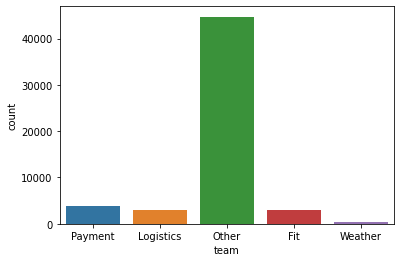

In [125]:
sns.countplot(data=teams, x='team')